## KNN : K-nearest Neighbours

KNN is a **supervised** instance based lazy learning algorithm used to solve both classification as well as regression problems but **mostly favoured for regression**. 

(supervised means we have the ground trusth availbale i.e we have features and labels)

**Core idea**: Objects that are close to each other in feature space often tend to have similar labels. 


**Approach** : When a new data point arrives: 
1) Compute its distance to all training points (commonly Euclidean distance).
2) Identify the k closest points (the “nearest neighbours”).
3) Aggregate their outputs:
    - Classification: majority vote of the neighbours’ classes
    - Regression: average (or weighted average) of the neighbours’ values. 


k-NN offers a simple, flexible, data-driven alternative.

- Is non-parametric
- Makes no assumptions about the underlying data distribution
- Can model highly irregular and nonlinear decision boundaries

**Classfication problem using K-nearest neighbours**

- We initialise a value of K , k > 0 can have any value to infinity, k is number of neighbours. 
- Say on selecting a particular value of k, we get the best model accuracy. say k=5
- Find the k = 5 nearest neighbours for the test data
- From those k = 5 values, how many neighbours belong to category A and how many belong to category B. Count them individually. say for category A, we have 3 , category B we have 2, 
- The highest of the above two decides the categiry of the test data in question i.e. so for the test data the category becomes A because the category A> category B. 

In order to select nearest neighbouirs, we need some sort of distances, there are 2 types of distances we can use
- Euclidean distance
- Manhattan distance

Choose either one, check accuracy and use the one giving better accuracy. 

**Regression Problem using K-nearest neighbours**

- You will find the K nearest neighbours 
- Then find the average of the feature for those k nearest neighbours and that will be the regression value for the new test data. 

**Choosing the optimal value of K**
- Small (k = 1, 2) : High variance (Overfitting)
-  Medium (k = 5-10) : Balanced
- High (k=100) : Too generalised and High bias (underfitting)

In [2]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [3]:

iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='species')

In [4]:
## Data description 
# species of iris  : 
# setosa
# versicolor
# virginica


## features for prediction: 
# sepal length (cms)
# sepal width (cms)
# petal length (cms)
# petal width (cms)

In [5]:
X_df = X.copy()
X_df['Actual'] = y

In [6]:
X_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Actual
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
X_df.shape

(150, 5)

In [8]:
print("Target classes: ", iris.target_names)

Target classes:  ['setosa' 'versicolor' 'virginica']


In [9]:
target_mapping = {i:str(name) for i, name in enumerate(iris.target_names)}
print(target_mapping)

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}


## Training

In [10]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
k = 5 ## This can be defined using cross validation or elbow method 
knn=KNeighborsClassifier(n_neighbors=k)

knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [13]:
y_train_pred = knn.predict(X_train_scaled)

y_test_pred = knn.predict(X_test_scaled)

## Evaluation

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

Training Accuracy: 0.975
Test Accuracy: 0.9333333333333333


**How to get the correct value of k above for how many nearest neighbours are needed**

We will plot the values of accuracy against k with the goal of having the maximum accuracy. If say for two values of k like k=17 and say k=100 we havce roughly same accuracy we will choose k=17 as it is computationaly less expensive with roughly the same accuracy. 

This is just like elbow method to choose K but having accuracy contrary to inertia as in K means clustering. 

In [16]:
import numpy as np
accuracy_test = []
error_rates = []
k_range = range(1,20)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    error = np.mean(y_pred != y_test)
    accuracy_test.append(accuracy)
    error_rates.append(error)

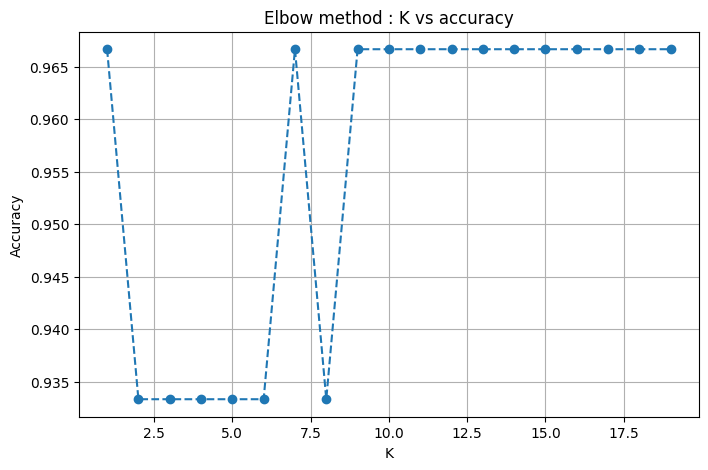

In [17]:
plt.figure(figsize=(8,5))
plt.plot(k_range, accuracy_test, marker = 'o', linestyle = '--')
plt.title('Elbow method : K vs accuracy')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [18]:
# accuracy_test
# error_rates

## from above it looks like the accuracy peaks around value of k = 9 

**2) Using cross validation we try to find the best value of K**

In [19]:
from sklearn.model_selection import cross_val_score
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [20]:
cv_scores = []
K_range = range (1,21)
for k in K_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn , X_scaled, y, cv=10, scoring ='accuracy')## for each value of k we will get 10 accuracies 
    print(f"Nearest neighbours selected : {k}, Mean scores : {scores.mean()}, scores for each fold : {scores.tolist()}")
    cv_scores.append(scores.mean())

Nearest neighbours selected : 1, Mean scores : 0.9533333333333334, scores for each fold : [1.0, 0.9333333333333333, 1.0, 0.9333333333333333, 0.8666666666666667, 1.0, 0.8, 1.0, 1.0, 1.0]
Nearest neighbours selected : 2, Mean scores : 0.9533333333333334, scores for each fold : [1.0, 0.9333333333333333, 1.0, 0.9333333333333333, 0.8666666666666667, 1.0, 0.8, 1.0, 1.0, 1.0]
Nearest neighbours selected : 3, Mean scores : 0.9533333333333334, scores for each fold : [1.0, 0.9333333333333333, 1.0, 0.9333333333333333, 0.8666666666666667, 1.0, 0.8, 1.0, 1.0, 1.0]
Nearest neighbours selected : 4, Mean scores : 0.9466666666666667, scores for each fold : [1.0, 0.9333333333333333, 1.0, 0.9333333333333333, 0.9333333333333333, 1.0, 0.8, 0.9333333333333333, 1.0, 0.9333333333333333]
Nearest neighbours selected : 5, Mean scores : 0.9533333333333334, scores for each fold : [1.0, 0.9333333333333333, 1.0, 0.9333333333333333, 0.8666666666666667, 0.9333333333333333, 0.8666666666666667, 1.0, 1.0, 1.0]
Nearest ne

In [27]:
best_k = K_range[np.argmax(cv_scores)]
print(f"Best value of K obtained using Cross validation is {best_k}")
print(f"Cross validation accuracy for K = {best_k} : {max(cv_scores):.4f}")


Best value of K obtained using Cross validation is 8
Cross validation accuracy for K = 8 : 0.9667


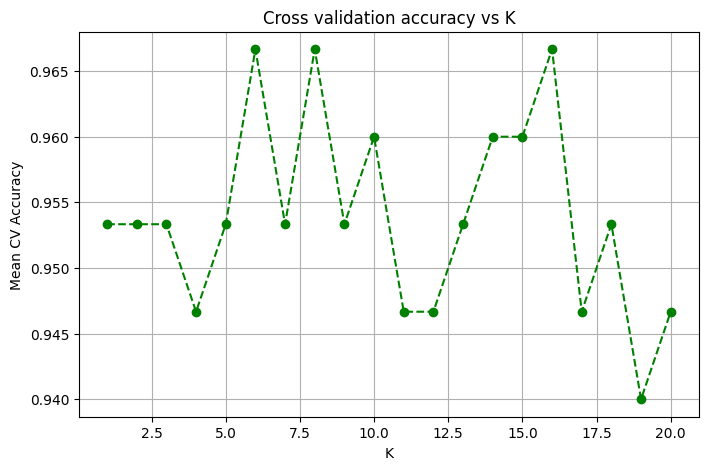

In [28]:
plt.figure(figsize=(8,5))
plt.plot(K_range, cv_scores, marker = 'o', linestyle = '--', color = 'green')
plt.title('Cross validation accuracy vs K')
plt.xlabel('K')
plt.ylabel('Mean CV Accuracy')
plt.grid(True)
plt.show()

## Prediction function

In [30]:
K = 8 ## OBTAINED FROM ABOVE
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

,n_neighbors,20
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [31]:
def predict_iris(sepal_length, sepal_width, petal_length, petal_width):
    sample_df = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]], columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
    sample_scaled = scaler.transform(sample_df)
    prediction = knn.predict(sample_scaled)[0]
    predicted_species = iris.target_names[prediction]
    return predicted_species, prediction

In [32]:
example_pred, prediction = predict_iris(5.1, 3.5, 1.4, 0.2)
print("\nExample Prediction -> Species:", example_pred)


Example Prediction -> Species: setosa
